## Neural networks learning

This exercise is described in [ex4.pdf](data/ml-ex4/ex4.pdf).

In [10]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

%matplotlib inline

In [11]:
# Load the hand-written digits dataset
digits = sio.loadmat('data/ml-ex4/ex4data1.mat')

In [12]:
# Digit image data (5000 images with 400 features/pixels)
X = digits['X']

# Digit classes (1-10) where digit 0 is assigned class 10
y = digits['y'].ravel()

Sample images are shown in [Exercise 3 notebook](ml-ex3.ipynb).

In [13]:
# Create a feed-forward neural network with a single hidden layer 
# with 25 logistic units. Input layer size is derived from number
# of features in X. Output layer size is derived from number of 
# classes in y.
clf = MLPClassifier((25,), activation='logistic', solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
# Classification accuracy on training set
clf.score(X, y)

0.99960000000000004

In [17]:
# For cross validation, use two stratified randomized folds 
# where the test set size = 0.1 * dataset size. Statified 
# means that the folds are made by preserving the percentage 
# of samples for each class.
cv = StratifiedShuffleSplit(2, test_size=0.1, random_state=0)

# Run a grid search to find the best value values for regularization 
# parameter alpha using the cross validator (cv) defined above.
gs = GridSearchCV(clf, param_grid={'alpha':[1e-2, 1e-1, 1e0, 1e1]}, cv=cv)
gs.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.1,
            train_size=None),
       error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
# Show the cross validation results in a pandas data frame
# - column mean_train_score: mean classification accuracy on training set
# - column mean_test_score: mean classification accuracy on test set
pd.DataFrame(gs.cv_results_)

/Users/sam/.virtualenvs/wsenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sam/.virtualenvs/wsenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sam/.virtualenvs/wsenv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sam/.

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.110186,0.001339,0.924,1.000000,0.01,{'alpha': 0.01},3,0.916,1.000000,0.932,1.000000,0.056318,0.000080,0.008,0.000000
1,1.651532,0.001430,0.934,1.000000,0.1,{'alpha': 0.1},2,0.922,1.000000,0.946,1.000000,0.024142,0.000090,0.012,0.000000
2,2.704351,0.001449,0.944,0.998111,1,{'alpha': 1.0},1,0.934,0.998444,0.954,0.997778,0.051714,0.000070,0.010,0.000333
3,2.751323,0.001440,0.920,0.941667,10,{'alpha': 10.0},4,0.912,0.943333,0.928,0.940000,0.167022,0.000016,0.008,0.001667


In [19]:
# Best classifier is the neural network with alpha=1.0
clf_best = gs.best_estimator_
clf_best

MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
# Classification accuracy on training set
clf_best.score(X, y)

0.99719999999999998

In [21]:
# Obtain weight matrix between input and hidden layer
# (input layer size = 400, hidden layer size = 25)
Theta1 = clf_best.coefs_[0].T
Theta1.shape

(25, 400)

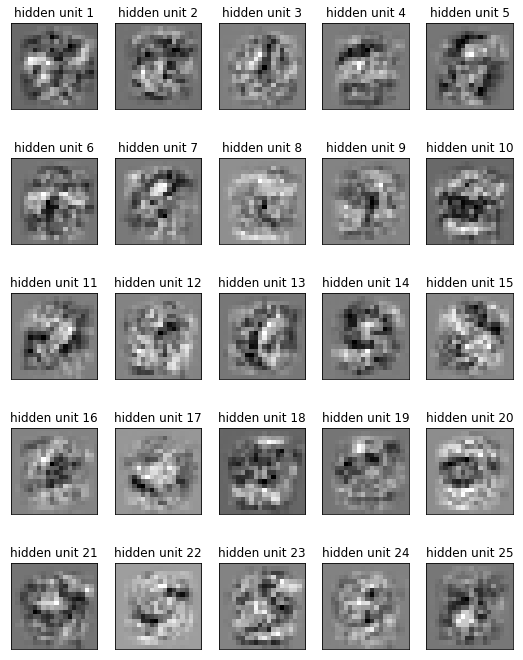

In [22]:
# Visualize input weights into hidden units (400 per hidden unit)
n_rows = 5
n_cols = 5

plt.subplots_adjust(top=.9, hspace=.4)
plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))

for i, row in enumerate(Theta1):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(row.reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'hidden unit {i + 1}')
    plt.xticks(())
    plt.yticks(())